# Load Libraries and Dataframe

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
airbnb_class_df = pd.read_csv("cleaned_data/airbnb_model_data_clean.csv", index_col=0)
zillow_class_df = pd.read_csv("cleaned_data/zillow_model_data_clean.csv", index_col=0)

In [3]:
airbnb_class_df.head()

,last_scraped,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,...,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate
0,2015-10-03,5795487,30066816,0,1.0,37080.0,36.274038,-86.910077,2,1.0,...,0,0,0,0,0,0,0,0,1,0.694371
1,2015-10-03,8082102,55304,0,1.0,37189.0,36.259632,-86.870691,4,1.0,...,0,0,0,0,0,0,0,0,1,0.428064
2,2015-10-03,2480117,3155867,0,3.0,37218.0,36.217547,-86.843971,2,0.5,...,0,0,0,0,0,0,0,0,1,0.658864
3,2015-10-03,8291271,1356379,0,1.0,37218.0,36.212933,-86.853004,2,1.0,...,0,0,0,0,0,0,0,0,1,0.428064
4,2015-10-03,997187,5479170,0,1.0,37218.0,36.221009,-86.873935,1,2.0,...,0,0,0,0,0,0,0,0,1,0.029590


In [4]:
zillow_class_df

,37013,37211,37075,38401,37128,37130,37064,37066,37122,37167,...,37141,38454,37057,37016,38567,37151,38552,37152,37140,avg_home_value
index,,,,,,,,,,,,,,,,,,,,,
1996-01-01,109670.0,106734.0,138933.0,96857.0,113158.0,98542.0,185356.0,120976.0,151290.0,106580.0,...,NaN,80110.0,50190.0,NaN,69190.0,67996.0,NaN,142441.0,NaN,109399.880435
1996-02-01,110113.0,107099.0,139381.0,97144.0,113284.0,98564.0,185830.0,121068.0,151334.0,106864.0,...,NaN,80458.0,50147.0,NaN,69869.0,67665.0,NaN,142789.0,NaN,109566.967391
1996-03-01,110502.0,107465.0,140085.0,97433.0,113470.0,98835.0,186363.0,121462.0,151342.0,107379.0,...,NaN,80650.0,50106.0,NaN,70266.0,67587.0,NaN,143113.0,NaN,109809.858696
1996-04-01,111295.0,108224.0,141375.0,97997.0,113974.0,99312.0,187234.0,122248.0,151801.0,108288.0,...,NaN,81164.0,50064.0,NaN,71463.0,67163.0,NaN,143664.0,NaN,110273.195652
1996-05-01,112128.0,108963.0,142817.0,98505.0,114588.0,99791.0,188162.0,123302.0,152404.0,109208.0,...,NaN,81770.0,50390.0,NaN,72299.0,67058.0,NaN,144220.0,NaN,110767.663043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,259031.0,293072.0,321959.0,238371.0,291541.0,247622.0,506703.0,287540.0,360988.0,267956.0,...,216270.0,156813.0,136128.0,196512.0,166713.0,156146.0,126236.0,235094.0,175110.0,288751.259615
2020-11-01,261394.0,295822.0,327365.0,240257.0,293749.0,249687.0,512290.0,291682.0,363554.0,269825.0,...,218049.0,158826.0,136663.0,196971.0,167100.0,156890.0,126264.0,238528.0,177055.0,291187.711538
2020-12-01,264071.0,299249.0,332140.0,241925.0,296529.0,252005.0,518804.0,295491.0,366496.0,272156.0,...,219840.0,161071.0,137790.0,198081.0,167797.0,158137.0,126226.0,242451.0,177552.0,293967.509615


# Question: Can we predict which zipcode is next to experience explosive growth?

To answer this question, we will take the average airbnb features in 2019 and see if we can build a model that classifies each zipcode as high, low or moderate growth in 2020.

# Explore Trends in Zipcode Prices

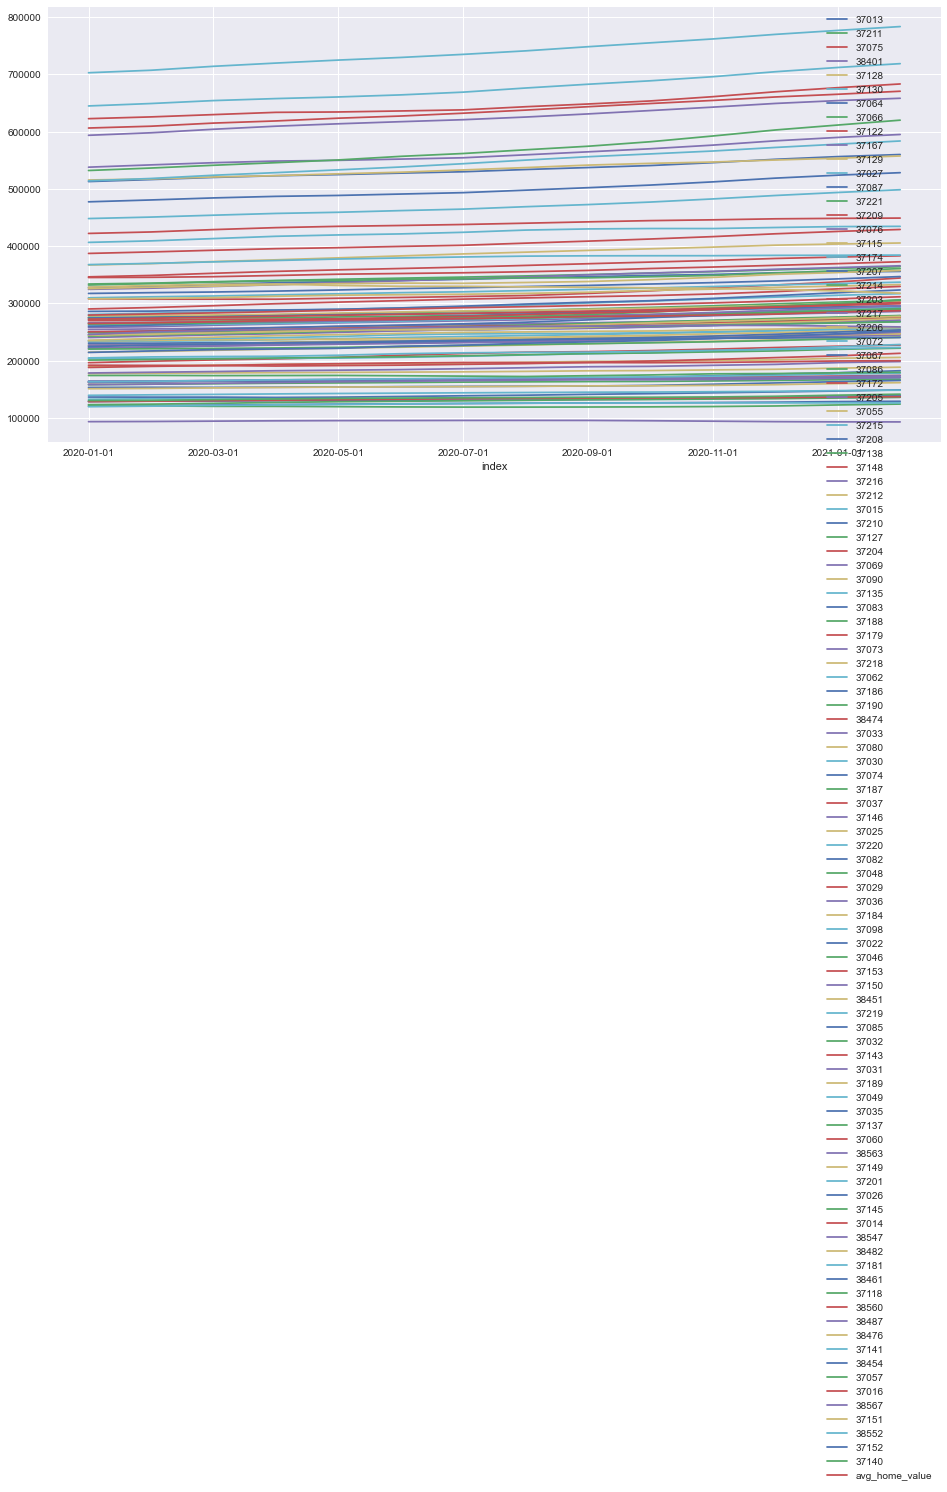

In [5]:
zillow_class_df['2020':].plot(figsize=(16,8));

In [6]:
zillow_class_df = zillow_class_df.T
zillow_class_df

index,1996-01-01,1996-02-01,1996-03-01,1996-04-01,1996-05-01,1996-06-01,1996-07-01,1996-08-01,1996-09-01,1996-10-01,...,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01
37013,109670.000000,110113.000000,110502.000000,111295.000000,112128.000000,112982.000000,113867.000000,114736.000000,115551.000000,116199.000000,...,251507.00,252671.00,253906.000000,255162.000000,257001.000000,259031.000000,261394.000000,264071.000000,266303.000000,268556.000000
37211,106734.000000,107099.000000,107465.000000,108224.000000,108963.000000,109639.000000,110367.000000,111082.000000,111876.000000,112514.000000,...,282124.00,283913.00,285863.000000,287953.000000,290494.000000,293072.000000,295822.000000,299249.000000,302286.000000,305349.000000
37075,138933.000000,139381.000000,140085.000000,141375.000000,142817.000000,144082.000000,145445.000000,146630.000000,147829.000000,148737.000000,...,309049.00,310372.00,312097.000000,313768.000000,317473.000000,321959.000000,327365.000000,332140.000000,337490.000000,344421.000000
38401,96857.000000,97144.000000,97433.000000,97997.000000,98505.000000,98876.000000,99176.000000,99412.000000,99541.000000,99683.000000,...,229911.00,231713.00,233094.000000,234462.000000,236156.000000,238371.000000,240257.000000,241925.000000,243219.000000,244825.000000
37128,113158.000000,113284.000000,113470.000000,113974.000000,114588.000000,115269.000000,115989.000000,116728.000000,117504.000000,118271.000000,...,283084.00,285083.00,286883.000000,288171.000000,289714.000000,291541.000000,293749.000000,296529.000000,300063.000000,303777.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37151,67996.000000,67665.000000,67587.000000,67163.000000,67058.000000,67093.000000,67431.000000,67678.000000,67417.000000,67352.000000,...,153947.00,154307.00,154702.000000,155258.000000,155945.000000,156146.000000,156890.000000,158137.000000,160025.000000,161658.000000
38552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123610.00,124530.00,125302.000000,125829.000000,126088.000000,126236.000000,126264.000000,126226.000000,126329.000000,126262.000000
37152,142441.000000,142789.000000,143113.000000,143664.000000,144220.000000,145047.000000,145783.000000,145725.000000,146104.000000,146220.000000,...,221599.00,225053.00,227110.000000,230542.000000,232892.000000,235094.000000,238528.000000,242451.000000,247005.000000,251824.000000
37140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,174218.00,173689.00,173042.000000,172364.000000,173759.000000,175110.000000,177055.000000,177552.000000,178666.000000,179792.000000


In [7]:
zillow_class_df['20_21_inc'] = ((zillow_class_df['2021-02-01']/zillow_class_df['2020-02-01'])-1)*100
zillow_class_df['19_20_inc'] = ((zillow_class_df['2020-02-01']/zillow_class_df['2019-02-01'])-1)*100

In [8]:
zillow_class_df['CAGR'] = ((zillow_class_df['2021-02-01']/zillow_class_df['2016-02-01'])**(1/5)-1)*100

In [9]:
zillow_class_df

index,1996-01-01,1996-02-01,1996-03-01,1996-04-01,1996-05-01,1996-06-01,1996-07-01,1996-08-01,1996-09-01,1996-10-01,...,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,20_21_inc,19_20_inc,CAGR
37013,109670.000000,110113.000000,110502.000000,111295.000000,112128.000000,112982.000000,113867.000000,114736.000000,115551.000000,116199.000000,...,255162.000000,257001.000000,259031.000000,261394.000000,264071.000000,266303.000000,268556.000000,8.817440,5.570361,9.447468
37211,106734.000000,107099.000000,107465.000000,108224.000000,108963.000000,109639.000000,110367.000000,111082.000000,111876.000000,112514.000000,...,287953.000000,290494.000000,293072.000000,295822.000000,299249.000000,302286.000000,305349.000000,10.599634,3.260687,8.593202
37075,138933.000000,139381.000000,140085.000000,141375.000000,142817.000000,144082.000000,145445.000000,146630.000000,147829.000000,148737.000000,...,313768.000000,317473.000000,321959.000000,327365.000000,332140.000000,337490.000000,344421.000000,12.035612,-0.648616,7.022097
38401,96857.000000,97144.000000,97433.000000,97997.000000,98505.000000,98876.000000,99176.000000,99412.000000,99541.000000,99683.000000,...,234462.000000,236156.000000,238371.000000,240257.000000,241925.000000,243219.000000,244825.000000,9.346178,7.524336,9.904022
37128,113158.000000,113284.000000,113470.000000,113974.000000,114588.000000,115269.000000,115989.000000,116728.000000,117504.000000,118271.000000,...,288171.000000,289714.000000,291541.000000,293749.000000,296529.000000,300063.000000,303777.000000,8.821359,3.896800,7.971138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37151,67996.000000,67665.000000,67587.000000,67163.000000,67058.000000,67093.000000,67431.000000,67678.000000,67417.000000,67352.000000,...,155258.000000,155945.000000,156146.000000,156890.000000,158137.000000,160025.000000,161658.000000,6.690162,5.625614,8.087127
38552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,125829.000000,126088.000000,126236.000000,126264.000000,126226.000000,126329.000000,126262.000000,4.703541,6.444580,8.618999
37152,142441.000000,142789.000000,143113.000000,143664.000000,144220.000000,145047.000000,145783.000000,145725.000000,146104.000000,146220.000000,...,230542.000000,232892.000000,235094.000000,238528.000000,242451.000000,247005.000000,251824.000000,16.034558,15.345572,11.124948
37140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,172364.000000,173759.000000,175110.000000,177055.000000,177552.000000,178666.000000,179792.000000,3.157399,2.730214,6.709765


In [10]:
zillow_class_df['20_21_inc'].describe()

count    105.000000
mean       8.822197
std        3.131870
min       -4.101828
25%        7.613578
50%        9.194465
75%       10.670426
max       16.034558
Name: 20_21_inc, dtype: float64

In [11]:
(zillow_class_df['20_21_inc'].max()-zillow_class_df['20_21_inc'].min())/3

6.712128630368187

In [13]:
zillow_class_df['20_21_inc'].max()-6.71

9.324558230618589

In [14]:
zillow_class_df['20_21_inc'].min()+6.71

2.6081723395140317

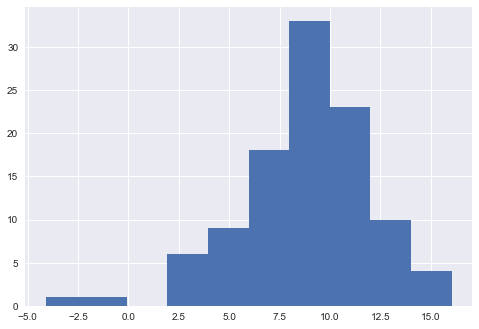

In [15]:
zillow_class_df['20_21_inc'].hist()

In [16]:
growth_categories = ['low','moderate','high' ]

In [51]:
def growth_category(x):
    if x < 9:
        return 'low'
    elif x > 11:
        return 'high'
    else:
        return 'moderate'

In [52]:
zillow_class_df['growth'] = zillow_class_df['20_21_inc'].apply(lambda x: growth_category(x))

In [53]:
zillow_class_df

index,1996-01-01,1996-02-01,1996-03-01,1996-04-01,1996-05-01,1996-06-01,1996-07-01,1996-08-01,1996-09-01,1996-10-01,...,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,20_21_inc,19_20_inc,CAGR,growth
37013,109670.000000,110113.000000,110502.000000,111295.000000,112128.000000,112982.000000,113867.000000,114736.000000,115551.000000,116199.000000,...,257001.000000,259031.000000,261394.000000,264071.000000,266303.000000,268556.000000,8.817440,5.570361,9.447468,low
37211,106734.000000,107099.000000,107465.000000,108224.000000,108963.000000,109639.000000,110367.000000,111082.000000,111876.000000,112514.000000,...,290494.000000,293072.000000,295822.000000,299249.000000,302286.000000,305349.000000,10.599634,3.260687,8.593202,moderate
37075,138933.000000,139381.000000,140085.000000,141375.000000,142817.000000,144082.000000,145445.000000,146630.000000,147829.000000,148737.000000,...,317473.000000,321959.000000,327365.000000,332140.000000,337490.000000,344421.000000,12.035612,-0.648616,7.022097,high
38401,96857.000000,97144.000000,97433.000000,97997.000000,98505.000000,98876.000000,99176.000000,99412.000000,99541.000000,99683.000000,...,236156.000000,238371.000000,240257.000000,241925.000000,243219.000000,244825.000000,9.346178,7.524336,9.904022,moderate
37128,113158.000000,113284.000000,113470.000000,113974.000000,114588.000000,115269.000000,115989.000000,116728.000000,117504.000000,118271.000000,...,289714.000000,291541.000000,293749.000000,296529.000000,300063.000000,303777.000000,8.821359,3.896800,7.971138,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37151,67996.000000,67665.000000,67587.000000,67163.000000,67058.000000,67093.000000,67431.000000,67678.000000,67417.000000,67352.000000,...,155945.000000,156146.000000,156890.000000,158137.000000,160025.000000,161658.000000,6.690162,5.625614,8.087127,low
38552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126088.000000,126236.000000,126264.000000,126226.000000,126329.000000,126262.000000,4.703541,6.444580,8.618999,low
37152,142441.000000,142789.000000,143113.000000,143664.000000,144220.000000,145047.000000,145783.000000,145725.000000,146104.000000,146220.000000,...,232892.000000,235094.000000,238528.000000,242451.000000,247005.000000,251824.000000,16.034558,15.345572,11.124948,high
37140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,173759.000000,175110.000000,177055.000000,177552.000000,178666.000000,179792.000000,3.157399,2.730214,6.709765,low


In [54]:
zillow_class_df['growth'].value_counts()

low         49
moderate    33
high        23
Name: growth, dtype: int64

## Create a dictionary of zipcodes and growth categories

In [55]:
growth_zips = dict(zip(list(zillow_class_df.index),list(zillow_class_df.growth)))

In [56]:
growth_zips

{'37013': 'low',
 '37211': 'moderate',
 '37075': 'high',
 '38401': 'moderate',
 '37128': 'low',
 '37130': 'moderate',
 '37064': 'moderate',
 '37066': 'high',
 '37122': 'low',
 '37167': 'moderate',
 '37129': 'moderate',
 '37027': 'moderate',
 '37087': 'low',
 '37221': 'low',
 '37209': 'moderate',
 '37076': 'moderate',
 '37115': 'high',
 '37174': 'low',
 '37207': 'high',
 '37214': 'high',
 '37203': 'low',
 '37217': 'moderate',
 '37206': 'moderate',
 '37072': 'high',
 '37067': 'low',
 '37086': 'moderate',
 '37172': 'high',
 '37205': 'moderate',
 '37055': 'low',
 '37215': 'moderate',
 '37208': 'low',
 '37138': 'moderate',
 '37148': 'high',
 '37216': 'high',
 '37212': 'low',
 '37015': 'high',
 '37210': 'high',
 '37127': 'moderate',
 '37204': 'moderate',
 '37069': 'moderate',
 '37090': 'low',
 '37135': 'moderate',
 '37083': 'low',
 '37188': 'moderate',
 '37179': 'moderate',
 '37073': 'high',
 '37218': 'low',
 '37062': 'high',
 '37186': 'moderate',
 '37190': 'low',
 '38474': 'low',
 '37033': 

# Create DF with 2019 Airbnb Data by Zipcode

In [57]:
airbnb_class_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233369 entries, 2015-10-03 to 2020-09-29
Data columns (total 47 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                233369 non-null  int64  
 1   host_id                           233369 non-null  int64  
 2   host_is_superhost                 233369 non-null  int64  
 3   host_listings_count               233369 non-null  float64
 4   zipcode                           233369 non-null  float64
 5   latitude                          233369 non-null  float64
 6   longitude                         233369 non-null  float64
 7   accommodates                      233369 non-null  int64  
 8   bathrooms                         233369 non-null  float64
 9   beds                              233369 non-null  float64
 10  price                             233369 non-null  float64
 11  guests_included                   23

In [58]:
airbnb_class_df['last_scraped'] = pd.to_datetime(airbnb_class_df['last_scraped'])
airbnb_class_df.set_index('last_scraped',inplace=True)

KeyError: 'last_scraped'

In [ ]:
airbnb_monthly = airbnb_class_df.resample('MS').mean()
airbnb_annual = airbnb_class_df.resample('Y').mean()

In [ ]:
zipcode_class_df = airbnb_class_df.groupby('zipcode').sum()
zipcode_class_df

In [ ]:
zipcode_class_df = airbnb_class_df['2019'].groupby('zipcode')
zipcode_class_monthly_df = zipcode_class_df.resample('M').sum()

In [ ]:
zipcode_class_monthly_df

In [ ]:
zipcode_class_monthly_df.drop(columns='zipcode', inplace=True)

In [59]:
zipcode_class_monthly_df.reset_index(inplace=True)

In [60]:
zipcode_class_monthly_df['last_scraped'] = pd.to_datetime(zipcode_class_monthly_df['last_scraped'])
zipcode_class_monthly_df.set_index('last_scraped',inplace=True)

In [61]:
zipcode_class_monthly_df_grp = zipcode_class_monthly_df.groupby('zipcode')
zipcode_class_ann_df = zipcode_class_monthly_df_grp.resample('A').mean()

In [62]:
zipcode_class_ann_df

,,zipcode,id,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate
zipcode,last_scraped,,,,,,,,,,,,,,,,,,,,,
37013.0,2019-12-31,37013.0,2.199842e+09,1.118011e+10,26.833333,328.750000,3058.320416,-7350.573946,369.166667,131.916667,209.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.500000,0.416667,0.000000,61.819930
37015.0,2019-12-31,37015.0,1.636789e+07,7.666481e+07,0.750000,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.290143
37026.0,2019-12-31,37026.0,3.964250e+07,1.212351e+08,0.000000,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428064
37027.0,2019-12-31,37027.0,1.982956e+08,6.155288e+08,6.416667,28.916667,414.461105,-997.933056,43.916667,14.625000,25.583333,...,0.000000,0.000000,2.083333,0.000000,0.000000,0.000000,9.416667,0.000000,0.000000,14.684705
37064.0,2019-12-31,37064.0,3.055183e+07,4.462003e+07,0.000000,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428064
37072.0,2019-12-31,37072.0,9.678657e+08,3.564924e+09,18.166667,491.833333,1495.127072,-3570.105354,182.833333,59.208333,96.416667,...,0.000000,33.666667,0.000000,0.000000,7.333333,0.000000,0.000000,0.000000,0.166667,27.507123
37073.0,2019-12-31,37073.0,3.059304e+07,2.291713e+08,0.750000,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773442
37076.0,2019-12-31,37076.0,1.434272e+09,5.802612e+09,41.416667,488.250000,2764.777564,-6617.522785,296.666667,104.291667,155.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.714284
37080.0,2019-12-31,37080.0,3.355815e+08,1.337936e+09,3.833333,90.333333,544.729935,-1303.419127,94.416667,32.708333,86.916667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,8.382759


In [63]:
airbnb_2019 = airbnb_class_df['2019-01-01':'2020-01-01']
airbnb_2019

,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate
last_scraped,,,,,,,,,,,,,,,,,,,,,
2019-10-18,6422,12172,1,1.0,37206.0,36.17315,-86.73581,2,1.0,3.0,...,1,0,0,0,0,0,0,0,0,0.970542
2019-10-18,20847,79021,1,3.0,37216.0,36.19640,-86.70427,1,1.0,1.0,...,1,0,0,0,0,0,0,0,0,4.655445
2019-10-18,25341,79021,1,3.0,37216.0,36.19705,-86.70494,1,1.0,2.0,...,1,0,0,0,0,0,0,0,0,3.708574
2019-10-18,25342,79021,1,3.0,37216.0,36.19712,-86.70445,1,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0.078906
2019-10-18,25613,95811,1,1.0,37206.0,36.17826,-86.74162,2,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0.844292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-21,38759583,252119936,0,1.0,37013.0,36.01776,-86.66782,6,2.5,3.0,...,0,0,0,0,0,0,1,0,0,0.428064
2019-09-20,38766473,160474948,0,48.0,37219.0,36.16730,-86.78397,2,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0.428064
2019-09-20,38767259,160474948,0,48.0,37219.0,36.16730,-86.78397,2,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0.428064


In [64]:
airbnb_dec_19 = airbnb_class_df['2019-12']
airbnb_dec_19_sum = airbnb_dec_19.groupby('zipcode').sum()

In [65]:
airbnb_dec_19_sum

,id,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2644044233,13556339658,34,648.0,3280.609710,-7884.777140,369,136.5,202.0,9612.0,...,0,0,0,0,0,0,19,0,0,87.042346
37015.0,16367890,76664807,1,1.0,36.233650,-86.906450,2,1.0,1.0,55.0,...,0,0,0,0,0,0,0,0,1,0.284061
37027.0,237962112,526091990,6,60.0,432.475510,-1041.298860,51,16.5,28.0,1228.0,...,0,0,2,0,0,0,10,0,0,17.018017
37072.0,1119952946,3987505676,23,640.0,1670.666280,-3989.124930,225,68.0,118.0,6473.0,...,0,40,0,0,6,0,0,0,0,23.958443
37073.0,30593043,229171323,1,1.0,36.397830,-86.761820,6,1.0,2.0,80.0,...,0,1,0,0,0,0,0,0,0,0.647028
37076.0,1752679915,7637026701,53,490.0,2894.303130,-6927.736310,315,107.0,166.0,7610.0,...,0,0,0,0,0,0,0,0,0,55.737770
37080.0,371110851,1460525872,7,64.0,544.734220,-1303.373580,102,36.5,93.0,5344.0,...,0,0,0,0,0,0,0,0,15,11.155313
37115.0,1576935152,5344651305,40,973.0,2501.853360,-5983.209630,365,110.0,201.0,10824.0,...,46,23,0,0,0,0,0,0,0,47.496712
37138.0,851822593,3535421189,12,1938.0,1159.863500,-2772.245380,143,51.0,77.0,7609.0,...,0,0,0,0,0,0,0,0,0,15.842320


In [66]:
airbnb_2019_zips = airbnb_2019.groupby('zipcode').mean()
airbnb_2019_zips

,id,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2.593134e+07,1.317891e+08,0.316306,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.241650,0.004912,0.000000,0.728722
37015.0,1.636789e+07,7.666481e+07,0.750000,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.290143
37026.0,3.964250e+07,1.212351e+08,0.000000,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428064
37027.0,1.724309e+07,5.352425e+07,0.557971,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,...,0.000000,0.000000,0.181159,0.000000,0.000000,0.000000,0.818841,0.000000,0.000000,1.276931
37064.0,3.055183e+07,4.462003e+07,0.000000,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428064
37072.0,2.351091e+07,8.659735e+07,0.441296,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,...,0.000000,0.817814,0.000000,0.000000,0.178138,0.000000,0.000000,0.000000,0.004049,0.668189
37073.0,3.059304e+07,2.291713e+08,0.750000,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773442
37076.0,1.876910e+07,7.593386e+07,0.541985,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.676741
37080.0,2.237210e+07,8.919574e+07,0.255556,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558851


In [67]:
cat_cols = ['host_is_superhost','instant_bookable','neighborhood_Bellevue',
                    'neighborhood_Donelson', 'neighborhood_Downtown',
                    'neighborhood_East_Nashville', 'neighborhood_Madison',
                    'neighborhood_Midtown', 'neighborhood_North_Nashville',
                    'neighborhood_Parkwood', 'neighborhood_South_Nashville',
                    'neighborhood_Southeast_Nashville', 'neighborhood_West_Nashville',
                    'neighborhood_Whites_Creek','property_type_Condominium', 'property_type_House',
                    'property_type_Other', 'property_type_Townhouse','room_type_Hotel room', 
                    'room_type_Private room','room_type_Shared room']

In [68]:
categorical_sums = airbnb_dec_19_sum[cat_cols]
#categorical_sums = zipcode_class_ann_df[cat_cols].reset_index()
categorical_sums

,host_is_superhost,instant_bookable,neighborhood_Bellevue,neighborhood_Donelson,neighborhood_Downtown,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,...,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,34,61,0,0,0,0,0,0,0,0,...,19,0,0,4,56,7,12,0,49,0
37015.0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
37027.0,6,7,0,0,0,0,0,2,0,0,...,10,0,0,1,7,1,1,0,1,0
37072.0,23,28,0,0,0,0,40,0,0,6,...,0,0,0,0,27,10,5,0,16,1
37073.0,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
37076.0,53,40,0,78,0,0,0,0,0,0,...,0,0,0,2,56,10,5,0,43,2
37080.0,7,13,0,0,0,0,0,0,0,0,...,0,0,15,0,4,10,0,0,7,0
37115.0,40,43,0,0,0,46,23,0,0,0,...,0,0,0,1,44,18,2,0,14,0
37138.0,12,18,0,32,0,0,0,0,0,0,...,0,0,0,0,20,6,2,0,13,1


In [69]:
airbnb_2019_zips.drop(columns=cat_cols, inplace=True)
airbnb_2019_zips = pd.concat([airbnb_2019_zips,categorical_sums], axis=1)

In [70]:
airbnb_2019_zips

,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,guests_included,...,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2.593134e+07,1.317891e+08,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,2.203340,...,19.0,0.0,0.0,4.0,56.0,7.0,12.0,0.0,49.0,0.0
37015.0,1.636789e+07,7.666481e+07,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,2.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
37026.0,3.964250e+07,1.212351e+08,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37027.0,1.724309e+07,5.352425e+07,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,1.739130,...,10.0,0.0,0.0,1.0,7.0,1.0,1.0,0.0,1.0,0.0
37064.0,3.055183e+07,4.462003e+07,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37072.0,2.351091e+07,8.659735e+07,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,2.032389,...,0.0,0.0,0.0,0.0,27.0,10.0,5.0,0.0,16.0,1.0
37073.0,3.059304e+07,2.291713e+08,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,2.750000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
37076.0,1.876910e+07,7.593386e+07,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,1.540894,...,0.0,0.0,0.0,2.0,56.0,10.0,5.0,0.0,43.0,2.0
37080.0,2.237210e+07,8.919574e+07,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,1.755556,...,0.0,0.0,15.0,0.0,4.0,10.0,0.0,0.0,7.0,0.0


In [71]:
airbnb_2019_zips.fillna(0, inplace=True)

In [72]:
airbnb_2019_zips

,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,guests_included,...,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2.593134e+07,1.317891e+08,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,2.203340,...,19.0,0.0,0.0,4.0,56.0,7.0,12.0,0.0,49.0,0.0
37015.0,1.636789e+07,7.666481e+07,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,2.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
37026.0,3.964250e+07,1.212351e+08,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37027.0,1.724309e+07,5.352425e+07,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,1.739130,...,10.0,0.0,0.0,1.0,7.0,1.0,1.0,0.0,1.0,0.0
37064.0,3.055183e+07,4.462003e+07,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37072.0,2.351091e+07,8.659735e+07,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,2.032389,...,0.0,0.0,0.0,0.0,27.0,10.0,5.0,0.0,16.0,1.0
37073.0,3.059304e+07,2.291713e+08,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,2.750000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
37076.0,1.876910e+07,7.593386e+07,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,1.540894,...,0.0,0.0,0.0,2.0,56.0,10.0,5.0,0.0,43.0,2.0
37080.0,2.237210e+07,8.919574e+07,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,1.755556,...,0.0,0.0,15.0,0.0,4.0,10.0,0.0,0.0,7.0,0.0


In [73]:
airbnb_2019_zips.reset_index(inplace=True)

In [74]:
airbnb_2019_zips

,zipcode,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,37013.0,2.593134e+07,1.317891e+08,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,...,19.0,0.0,0.0,4.0,56.0,7.0,12.0,0.0,49.0,0.0
1,37015.0,1.636789e+07,7.666481e+07,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37026.0,3.964250e+07,1.212351e+08,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37027.0,1.724309e+07,5.352425e+07,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,...,10.0,0.0,0.0,1.0,7.0,1.0,1.0,0.0,1.0,0.0
4,37064.0,3.055183e+07,4.462003e+07,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,37072.0,2.351091e+07,8.659735e+07,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,...,0.0,0.0,0.0,0.0,27.0,10.0,5.0,0.0,16.0,1.0
6,37073.0,3.059304e+07,2.291713e+08,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,37076.0,1.876910e+07,7.593386e+07,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,...,0.0,0.0,0.0,2.0,56.0,10.0,5.0,0.0,43.0,2.0
8,37080.0,2.237210e+07,8.919574e+07,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,...,0.0,0.0,15.0,0.0,4.0,10.0,0.0,0.0,7.0,0.0
9,37086.0,3.131322e+07,1.239516e+08,1.000000,36.027800,-86.570550,7.000000,2.000000,2.000000,250.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
airbnb_2019_zips['zipcode'] = airbnb_2019_zips['zipcode'].apply(lambda x: str(x))
airbnb_2019_zips['zipcode'] = airbnb_2019_zips['zipcode'].apply(lambda x: x.replace('.0',''))

In [76]:
airbnb_2019_zips['zipcode'][0]

'37013'

In [77]:
airbnb_2019_zips['growth_category'] = airbnb_2019_zips['zipcode'].map(growth_zips)

In [78]:
airbnb_2019_zips

,zipcode,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,growth_category
0,37013,2.593134e+07,1.317891e+08,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,...,0.0,0.0,4.0,56.0,7.0,12.0,0.0,49.0,0.0,low
1,37015,1.636789e+07,7.666481e+07,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,high
2,37026,3.964250e+07,1.212351e+08,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low
3,37027,1.724309e+07,5.352425e+07,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,...,0.0,0.0,1.0,7.0,1.0,1.0,0.0,1.0,0.0,moderate
4,37064,3.055183e+07,4.462003e+07,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,moderate
5,37072,2.351091e+07,8.659735e+07,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,...,0.0,0.0,0.0,27.0,10.0,5.0,0.0,16.0,1.0,high
6,37073,3.059304e+07,2.291713e+08,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high
7,37076,1.876910e+07,7.593386e+07,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,...,0.0,0.0,2.0,56.0,10.0,5.0,0.0,43.0,2.0,moderate
8,37080,2.237210e+07,8.919574e+07,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,...,0.0,15.0,0.0,4.0,10.0,0.0,0.0,7.0,0.0,low
9,37086,3.131322e+07,1.239516e+08,1.000000,36.027800,-86.570550,7.000000,2.000000,2.000000,250.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,moderate


In [79]:
airbnb_2019_zips.growth_category.value_counts(dropna=False)

moderate    12
high        11
low         10
NaN          5
Name: growth_category, dtype: int64

In [80]:
# pull in additional zipcodes later
addtl_zips = list(airbnb_2019_zips[airbnb_2019_zips['growth_category'].isnull()].zipcode.value_counts().index)

In [81]:
addtl_zips

['37222', '37243', '37213', '37232', '37228']

In [82]:
# change this later
airbnb_2019_zips.dropna(inplace=True)

In [83]:
growth_labels = {'low':0,'moderate':1,'high':2}
airbnb_2019_zips['growth_category'] = airbnb_2019_zips['growth_category'].map(growth_labels)

In [84]:
airbnb_2019_zips

,zipcode,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,growth_category
0,37013,2.593134e+07,1.317891e+08,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,...,0.0,0.0,4.0,56.0,7.0,12.0,0.0,49.0,0.0,0
1,37015,1.636789e+07,7.666481e+07,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
2,37026,3.964250e+07,1.212351e+08,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,37027,1.724309e+07,5.352425e+07,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,...,0.0,0.0,1.0,7.0,1.0,1.0,0.0,1.0,0.0,1
4,37064,3.055183e+07,4.462003e+07,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,37072,2.351091e+07,8.659735e+07,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,...,0.0,0.0,0.0,27.0,10.0,5.0,0.0,16.0,1.0,2
6,37073,3.059304e+07,2.291713e+08,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
7,37076,1.876910e+07,7.593386e+07,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,...,0.0,0.0,2.0,56.0,10.0,5.0,0.0,43.0,2.0,1
8,37080,2.237210e+07,8.919574e+07,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,...,0.0,15.0,0.0,4.0,10.0,0.0,0.0,7.0,0.0,0
9,37086,3.131322e+07,1.239516e+08,1.000000,36.027800,-86.570550,7.000000,2.000000,2.000000,250.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [85]:
airbnb_2019_zips.columns

Index(['zipcode', 'id', 'host_id', 'host_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'beds', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'occ_rate',
       'host_is_superhost', 'instant_bookable', 'neighborhood_Bellevue',
       'neighborhood_Donelson', 'neighborhood_Downtown',
       'neighborhood_East_Nashville', 'neighborhood_Madison',
       'neighborhood_Midtown', 'neighborhood_North_Nashville',
       'neighborhood_Parkwood', 'neighborhood_South_Nashville',
       'neighborhood_Southeast_Nashville', 'neighborhood_West_Nashville',
       'neighborhood_Whites_Creek', 'property_type_Condominium',
       'proper

# Train a Classifier based on 2019 Airbnb Data

In [86]:
'host_listings_count','accommodates', 'bathrooms', 'beds', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'occ_rate',
       'host_is_superhost', 'instant_bookable',

IndentationError: unexpected indent (<ipython-input-86-8d758eed37f2>, line 2)

In [87]:
classifier_data = airbnb_2019_zips.drop(columns=['id','host_id','latitude','longitude','neighborhood_Bellevue',
       'neighborhood_Donelson', 'neighborhood_Downtown',
       'neighborhood_East_Nashville', 'neighborhood_Madison',
       'neighborhood_Midtown', 'neighborhood_North_Nashville',
       'neighborhood_Parkwood', 'neighborhood_South_Nashville',
       'neighborhood_Southeast_Nashville', 'neighborhood_West_Nashville',
       'neighborhood_Whites_Creek'])

In [88]:
y = classifier_data['growth_category']
X = classifier_data.drop(columns=['growth_category','zipcode'])

In [89]:
X

,host_listings_count,accommodates,bathrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,...,occ_rate,host_is_superhost,instant_bookable,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,3.875246,4.351670,1.555010,2.469548,125.628684,2.203340,4.185658,833.228880,14.259332,32.236739,...,0.728722,34.0,61.0,4.0,56.0,7.0,12.0,0.0,49.0,0.0
1,1.000000,2.000000,1.000000,1.000000,60.833333,2.000000,2.000000,60.000000,23.083333,51.666667,...,0.290143,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,534.000000,4.000000,1.000000,2.000000,155.000000,1.000000,3.000000,1125.000000,25.000000,55.000000,...,0.428064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.514493,3.818841,1.271739,2.224638,101.333333,1.739130,17.123188,599.673913,7.289855,18.108696,...,1.276931,6.0,7.0,1.0,7.0,1.0,1.0,0.0,1.0,0.0
4,2.000000,8.000000,3.000000,3.000000,275.000000,1.000000,2.000000,15.000000,30.000000,60.000000,...,0.428064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,11.947368,4.441296,1.438259,2.342105,125.186235,2.032389,3.135628,599.010121,14.085020,32.619433,...,0.668189,23.0,28.0,0.0,27.0,10.0,5.0,0.0,16.0,1.0
6,1.000000,6.000000,1.000000,3.166667,80.000000,2.750000,2.000000,1125.000000,15.666667,34.000000,...,0.773442,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,6.389313,3.882225,1.364776,2.037077,98.631407,1.540894,9.000000,642.970556,13.068702,30.675027,...,0.676741,53.0,40.0,2.0,56.0,10.0,5.0,0.0,43.0,2.0
8,6.022222,6.294444,2.180556,5.794444,326.911111,1.755556,1.983333,881.516667,15.044444,33.433333,...,0.558851,7.0,13.0,0.0,4.0,10.0,0.0,0.0,7.0,0.0
9,1.000000,7.000000,2.000000,2.000000,250.000000,1.000000,1.000000,1125.000000,20.000000,50.000000,...,0.428064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
class_names = np.array(['low','moderate','high'])

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [103]:
X_test

,host_listings_count,accommodates,bathrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,...,occ_rate,host_is_superhost,instant_bookable,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
10,10.799279,5.248798,1.566707,2.819712,160.616587,2.513221,3.104567,683.086538,13.301683,31.162260,...,0.730965,40.0,43.0,1.0,44.0,18.0,2.0,0.0,14.0,0.0
21,14.593250,7.249566,2.135487,4.276181,244.019479,3.600579,3.708582,627.720926,13.443973,30.563356,...,0.628223,303.0,346.0,45.0,261.0,56.0,86.0,0.0,47.0,1.0
0,3.875246,4.351670,1.555010,2.469548,125.628684,2.203340,4.185658,833.228880,14.259332,32.236739,...,0.728722,34.0,61.0,4.0,56.0,7.0,12.0,0.0,49.0,0.0
9,1.000000,7.000000,2.000000,2.000000,250.000000,1.000000,1.000000,1125.000000,20.000000,50.000000,...,0.428064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,15.531288,7.086912,2.136196,4.231697,202.887321,3.149284,3.520245,658.512065,12.853170,29.186299,...,0.709908,299.0,319.0,9.0,295.0,46.0,87.0,0.0,56.0,9.0
20,26.995618,7.474671,2.107362,4.230850,275.176161,3.452761,3.602279,714.847853,13.658195,30.737774,...,0.782660,299.0,402.0,26.0,317.0,31.0,65.0,0.0,63.0,0.0
33,20.396501,3.832362,1.443149,1.865889,117.492711,2.080175,5.069971,563.120991,11.304665,26.381924,...,0.578288,24.0,22.0,3.0,23.0,9.0,4.0,0.0,20.0,0.0
18,20.731542,5.517100,1.657093,2.814899,202.860436,2.820044,3.996189,679.974374,12.239211,28.128608,...,0.787906,685.0,536.0,40.0,503.0,224.0,55.0,37.0,132.0,0.0
28,9.354015,5.671716,1.673065,3.032164,170.478107,2.956422,4.032579,609.773397,12.271011,28.613198,...,0.792084,314.0,265.0,13.0,282.0,76.0,49.0,0.0,78.0,0.0
8,6.022222,6.294444,2.180556,5.794444,326.911111,1.755556,1.983333,881.516667,15.044444,33.433333,...,0.558851,7.0,13.0,0.0,4.0,10.0,0.0,0.0,7.0,0.0


In [104]:
X_train

,host_listings_count,accommodates,bathrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,...,occ_rate,host_is_superhost,instant_bookable,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
31,917.393007,4.183573,1.203424,2.054089,643.907121,2.563285,1.547623,686.569477,11.520852,29.385540,...,0.494254,53.0,467.0,48.0,1.0,33.0,2.0,1.0,3.0,1.0
7,6.389313,3.882225,1.364776,2.037077,98.631407,1.540894,9.000000,642.970556,13.068702,30.675027,...,0.676741,53.0,40.0,2.0,56.0,10.0,5.0,0.0,43.0,2.0
2,534.000000,4.000000,1.000000,2.000000,155.000000,1.000000,3.000000,1125.000000,25.000000,55.000000,...,0.428064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,18.522536,5.522169,1.488457,3.085746,283.424698,2.923415,1.648956,612.228655,14.499450,32.862587,...,0.635319,137.0,180.0,85.0,1.0,89.0,1.0,13.0,0.0,1.0
26,195.283716,6.125627,1.645553,3.306941,184.088678,2.335181,4.000792,477.261283,10.514120,24.155714,...,0.652054,177.0,188.0,64.0,142.0,61.0,18.0,5.0,61.0,0.0
4,2.000000,8.000000,3.000000,3.000000,275.000000,1.000000,2.000000,15.000000,30.000000,60.000000,...,0.428064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,11.947368,4.441296,1.438259,2.342105,125.186235,2.032389,3.135628,599.010121,14.085020,32.619433,...,0.668189,23.0,28.0,0.0,27.0,10.0,5.0,0.0,16.0,1.0
6,1.000000,6.000000,1.000000,3.166667,80.000000,2.750000,2.000000,1125.000000,15.666667,34.000000,...,0.773442,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,53.858824,4.390588,1.557647,2.270588,224.051765,2.247059,4.103529,532.727059,14.931765,33.437647,...,0.460524,12.0,18.0,0.0,20.0,6.0,2.0,0.0,13.0,1.0
23,6.678593,5.142511,1.450424,2.622498,125.187690,2.832323,3.374166,569.734688,10.985749,25.515161,...,0.732526,165.0,166.0,6.0,162.0,56.0,16.0,0.0,77.0,2.0


In [105]:
def get_scores(y_test, y_hat_test):
    scores_dict = {'precision':round(precision_score(y_test, y_hat_test, average='weighted'),2),
           'recall': round(recall_score(y_test, y_hat_test, average='weighted'),2),
           'accuracy': round(accuracy_score(y_test, y_hat_test),2),
           'f1': round(f1_score(y_test, y_hat_test,average='weighted'),2)}
    return scores_dict

In [106]:
def run_model(model):
    
    # fit model
    model.fit(X_train, y_train)
    
    # make predictions
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    # print classification report
    print(f'Training accuracy score: {round(accuracy_score(y_train,y_hat_train),2)}')
    print(classification_report(y_test, y_hat_test, target_names=class_names))
    
    # plot confusion matrix
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = plot_confusion_matrix(model, X_test, y_test, ax = ax,
                                 display_labels = class_names,
                                 normalize='true')
    plt.grid(False)
    
    return get_scores(y_test, y_hat_test)

In [107]:
def plot_top_10_features(model, model_name):
    feature_names = X_train.columns
    feature_imports = model.feature_importances_
    most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], 
                                     columns=["Feature", "Importance"]).nlargest(10, "Importance")
    most_imp_features.sort_values(by="Importance", inplace=True)

    plt.figure(figsize=(12,5))
    plt.barh(range(len(most_imp_features)), most_imp_features.Importance, 
             align='center', alpha=0.8, color='teal')
    plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=12)
    plt.xlabel('Importance')
    plt.title(f'Most Important Features - {model_name}', fontsize=12)
    plt.show()

Training accuracy score: 1.0
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
    moderate       0.33      0.67      0.44         3
        high       0.50      0.67      0.57         3

    accuracy                           0.40        10
   macro avg       0.28      0.44      0.34        10
weighted avg       0.25      0.40      0.30        10



C:\Users\saman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


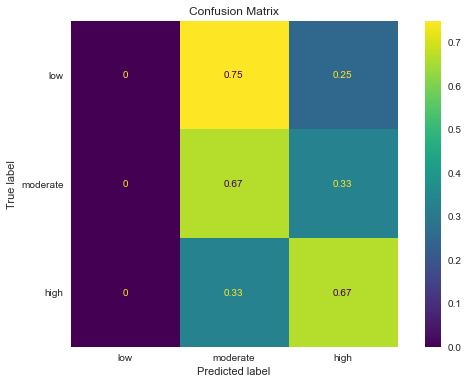

In [108]:
tree_baseline = DecisionTreeClassifier(random_state=3)
tree_baseline.fit(X_train, y_train)
    
    # make predictions
y_hat_train = tree_baseline.predict(X_train)
y_hat_test = tree_baseline.predict(X_test)
    
    # print classification report
print(f'Training accuracy score: {round(accuracy_score(y_train,y_hat_train),2)}')
print(classification_report(y_test, y_hat_test, target_names=class_names))
    
    # plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp = plot_confusion_matrix(tree_baseline, X_test, y_test, ax = ax,
                                 display_labels = class_names,
                                 normalize='true')
plt.grid(False)

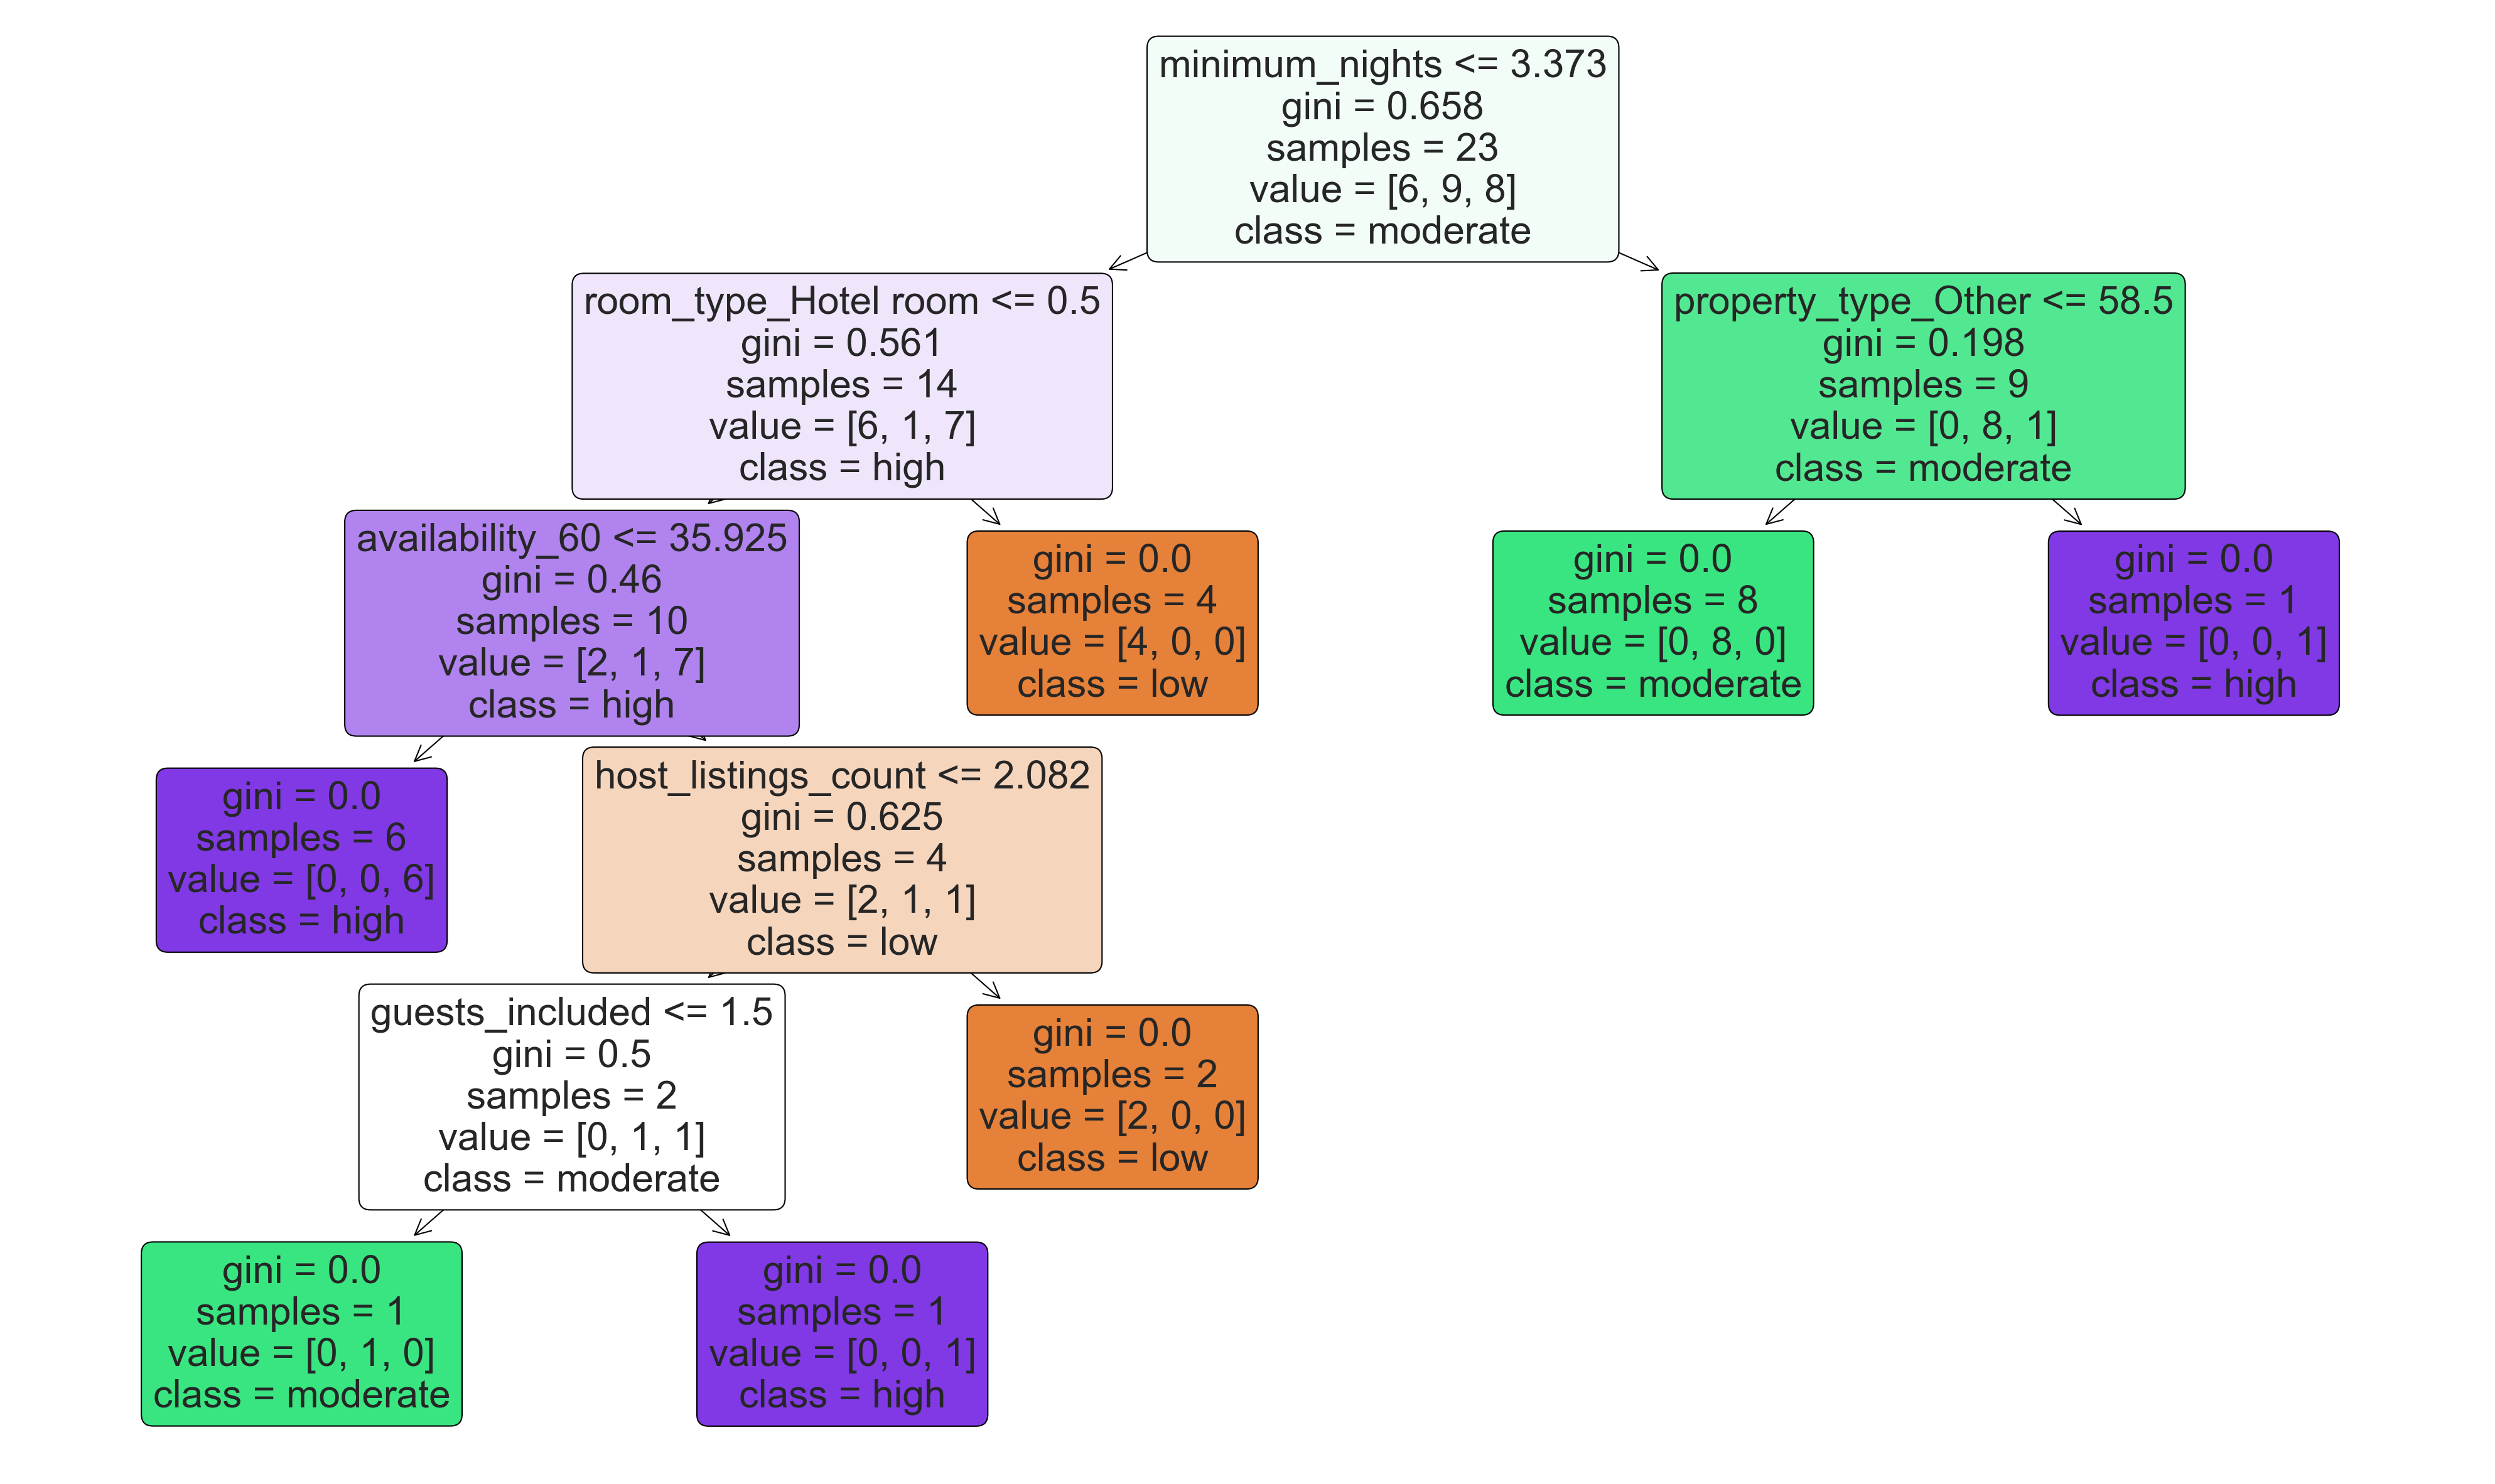

In [109]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,6), dpi=500)
plot_tree(tree_baseline,
          feature_names = X.columns, 
          class_names = class_names,
          filled = True, rounded=True)
plt.show()

In [110]:
get_scores(y_test, y_hat_test)

C:\Users\saman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'precision': 0.25, 'recall': 0.4, 'accuracy': 0.4, 'f1': 0.3}

Training accuracy score: 1.0
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
    moderate       0.33      0.67      0.44         3
        high       0.50      0.67      0.57         3

    accuracy                           0.40        10
   macro avg       0.28      0.44      0.34        10
weighted avg       0.25      0.40      0.30        10



C:\Users\saman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


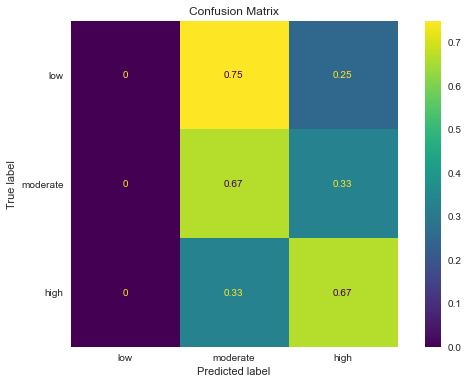

In [111]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_baseline = DecisionTreeClassifier(random_state=3)
tree_scores = run_model(tree_baseline)

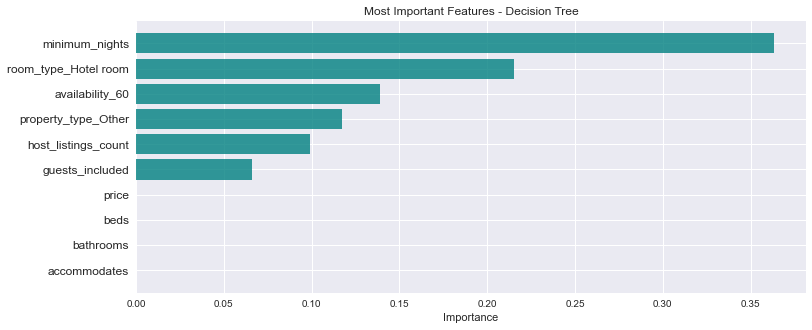

In [112]:
plot_top_10_features(tree_baseline, 'Decision Tree')